In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and save as a grouped csv, this step was only run once to group data, 
# some manual modifications were made on the grouped spreadsheet

dfList = []

topics = ['Ecological', 'Environmental Science', 'Urban, disaster and community', 'Energy and power-grid']

file = open('data/modelling_reading.xlsx', 'rb')
for topic in topics:
    dfTopic = pd.read_excel(file, sheet_name=topic, engine='openpyxl')
    dfTopic['topic'] = topic
    dfList.append(dfTopic)

  
df = pd.concat(dfList, ignore_index=True)

# Cleaning data

## Replace False and True by numbers
df = df.replace(False, 0)
df = df.replace(True, 1)

df = df.replace('Compound indexes with mostly individual level components', 
                        'Compound indicator at individual level')
df = df.replace('Compound indexes with mostly system level components', 
                        'Compound indicator at system level')

df.to_excel('data/modelling_grouped.xlsx', index=False)

/home/vitor/.pyenv/versions/virtual-env-3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/vitor/.pyenv/versions/virtual-env-3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/vitor/.pyenv/versions/virtual-env-3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/vitor/.pyenv/versions/virtual-env-3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_213733/2885997770.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [3]:
# Drop columns that will not be used
drop_columns = ['Metric name (optional)', 'System modelled', 'Disturbance modelled', 'Model type',
                'Why diversity', 'Justification from question 1', 'Justification from question 2',
                'Justification from question 3', 'Metric name (optional)', 'Type of data needed to compute',
                'Reference to original metric definition (optional)',
                'Definition of resilience (optional)', 'Other']
df = df.drop(columns=drop_columns)

# Rename columns
new_columns_name = ['paper_title', 'paper_DOI', 'reader', 'origin', 'discipline', 'category', 'diversity-based', 
                    'agency-based1', 'agency-based2', 'agency-based3', 'description']
new_columns = dict(zip(list(df.columns), new_columns_name))
df = df.rename(columns=new_columns)

In [4]:
# Print percentages

dfGroup = df.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topics'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

dfGroup

category,Compound indicator at system level,Early-warning signals,Performance under disruption,Shape of potential landscape,System Structure
topic,,,,,
Ecological,0.050000,0.150000,0.400000,0.250000,0.150000
Energy and power-grid,NaN,NaN,0.800000,NaN,0.200000
Environmental Science,0.050000,0.150000,0.700000,0.100000,NaN
"Urban, disaster and community",0.166667,NaN,0.833333,NaN,NaN
All topics,0.055556,0.083333,0.666667,0.097222,0.097222


In [5]:
len(df)

72

In [6]:
# Setting plot common variables

# Set font
plt.rc('font', size=20)

# Set category color palette
category_colors = {
  'Performance under disruption': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
  'Compound indicator at system level': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
  'Compound indicator at individual level': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
  'System Structure': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  'Shape of potential landscape': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  'Early-warning signals': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
}

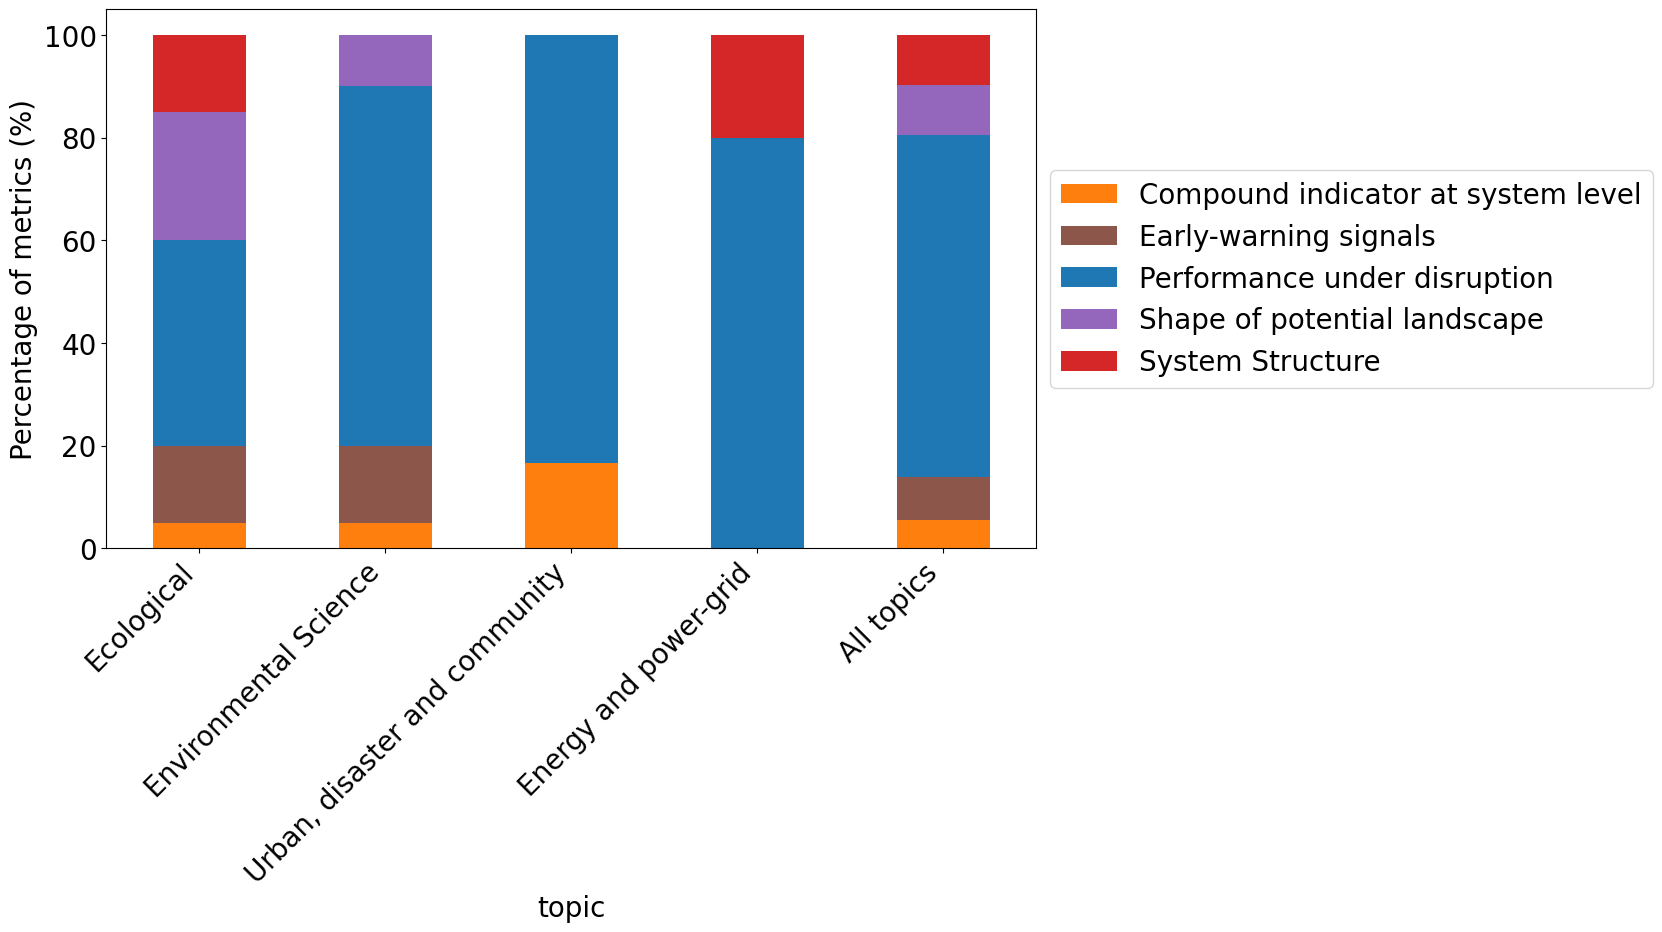

In [7]:
# Metric category per topic model

dfGroup = df.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack().reindex(topics)
dfGroup.loc['All topics'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

colors = [category_colors[cat] for cat in dfGroup.columns]
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage of metrics (%)")

plt.savefig("results/modelling_categories.png", bbox_inches='tight')

In [8]:
# Proportion of agency and diversity-based metrics per topic and overall
dfAgency = df[['topic', 'agency-based3']].groupby('topic').sum()
dfAgency = dfAgency.unstack()

dfGroup = df[['topic']].groupby('topic').size()
all_proportion = dfAgency.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfAgency = dfAgency.div(dfGroup)
dfAgency.loc['All topics'] = all_proportion

print(dfAgency)

dfDiversity = df[['topic', 'diversity-based']].groupby('topic').sum()
dfDiversity = dfDiversity.unstack()

dfGroup = df[['topic']].groupby('topic').size()
all_proportion = dfDiversity.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfDiversity = dfDiversity.div(dfGroup)
dfDiversity.loc['All topic'] = all_proportion

print(dfDiversity)

               topic                        
agency-based3  Ecological                       0.000000
               Energy and power-grid            0.000000
               Environmental Science            0.100000
               Urban, disaster and community    0.166667
All topics                                      0.055556
dtype: float64
                 topic                        
diversity-based  Ecological                       0.150000
                 Energy and power-grid            0.150000
                 Environmental Science            0.100000
                 Urban, disaster and community    0.083333
All topic                                         0.125000
dtype: float64


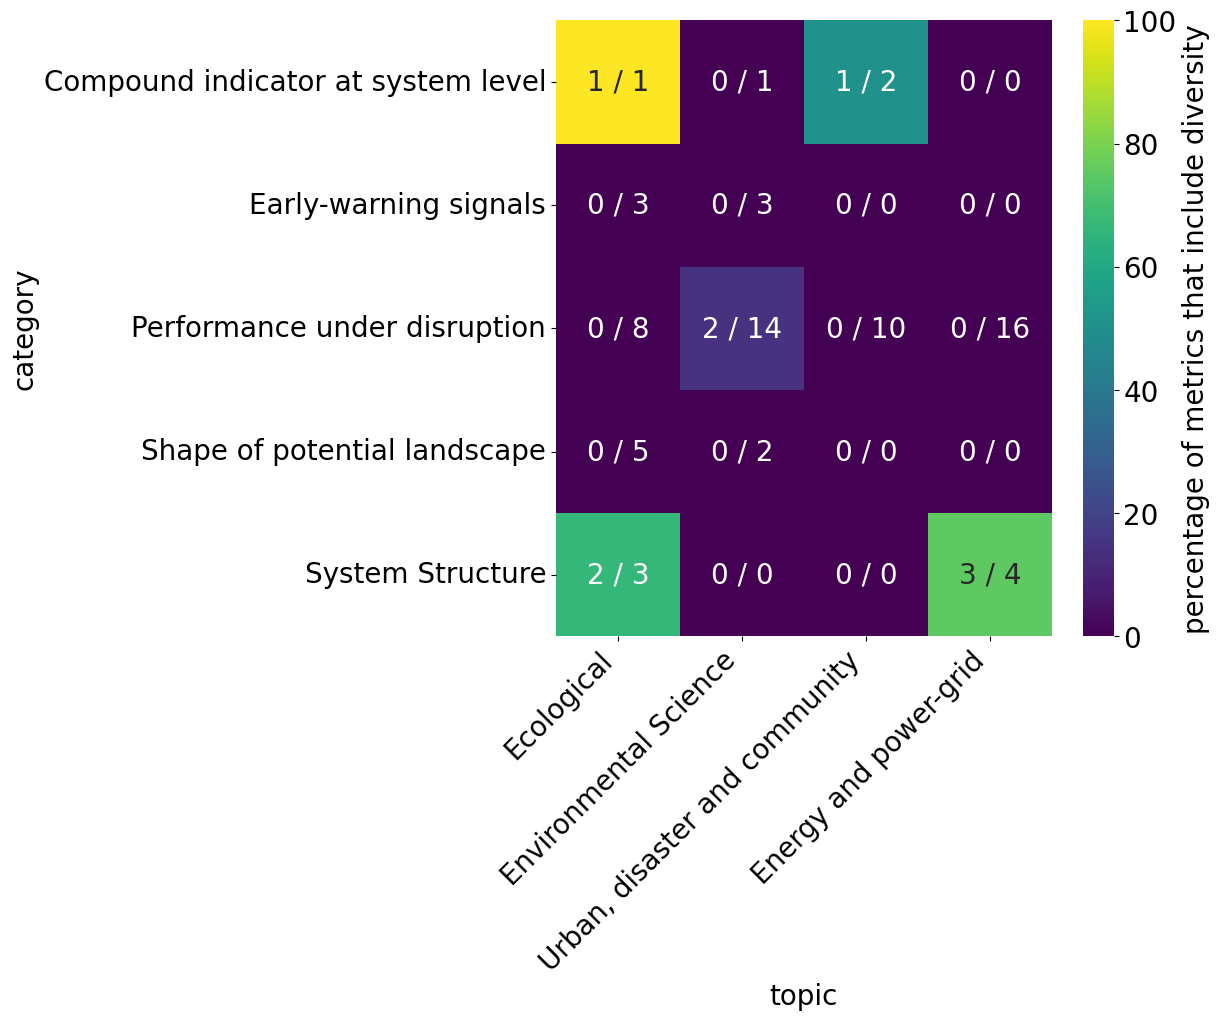

In [9]:
# Diversity-based metric per category and topic model

number_diversity = df[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).sum()
number_diversity = number_diversity['diversity-based'].map(int)
number_metric = df[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).count()
number_metric = number_metric['diversity-based']

annotate = number_diversity.map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = 100 * number_diversity / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(8, 8))
label_cbar = 'percentage of metrics that include diversity'
sns.heatmap(percentage[topics], annot=annotate[topics], fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')
plt.xticks(rotation=45, ha='right')

plt.savefig("results/modelling_diversity.png", bbox_inches='tight')

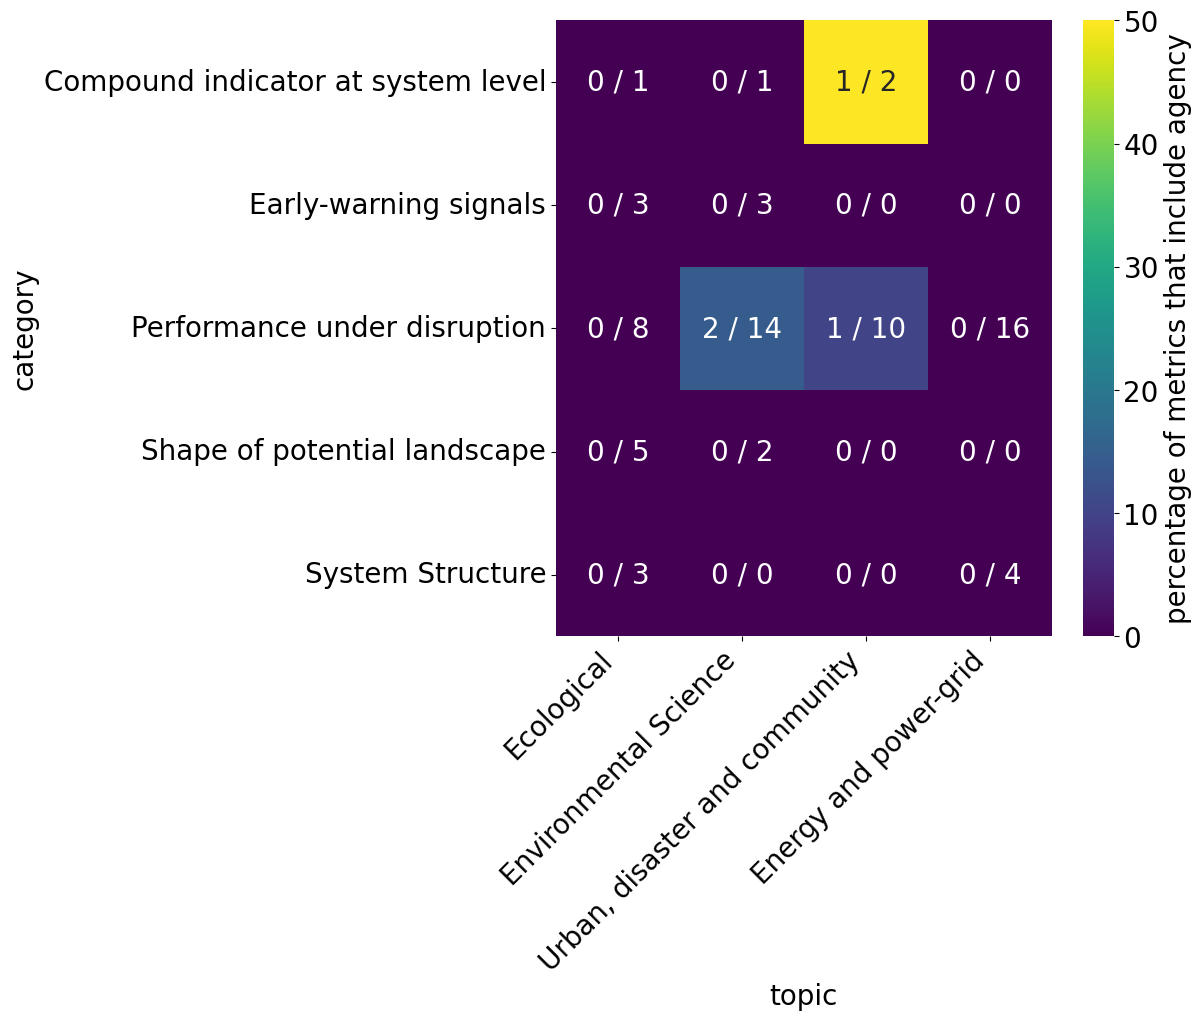

In [10]:
# Diversity-based metric per category and topic model


number_agency3 = df[['topic', 'category', 'agency-based3']].groupby(['topic', 'category']).sum()
number_agency3 = number_agency3['agency-based3'].map(int)
number_metric = df[['topic', 'category', 'agency-based3']].groupby(['topic', 'category']).count()
number_metric = number_metric['agency-based3']

annotate = number_agency3.map(int).map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = 100 * number_agency3 / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(8, 8))
label_cbar = 'percentage of metrics that include agency'
sns.heatmap(percentage[topics], annot=annotate[topics], fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')

plt.xticks(rotation=45, ha='right')

plt.savefig("results/modelling_agency.png", bbox_inches='tight')